In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Load Data into DataFrame:
• Import necessary libraries.
• Load the dataset from a CSV file into Pandas DataFrame

In [2]:
# 1. Loading the Dataset

# Reading the data from the insurance excel file
data = pd.read_csv("insurance.csv")

In [3]:
#Printing shape of original data
print("Shape of data: ", data.shape)

Shape of data:  (1338, 7)


In [4]:
#Displaying first few rows
data.head(10)

,Age,Gender,BMI,Children,Smoker,Region,Expenses
0,19.0,female,27.9,0,yes,southwest,16884.92
1,18.0,male,33.8,1,no,southeast,1725.55
2,28.0,male,33.0,3,no,southeast,4449.46
3,33.0,male,22.7,0,no,northwest,21984.47
4,32.0,male,28.9,0,no,northwest,3866.86
5,31.0,female,25.7,0,no,southeast,3756.62
6,46.0,female,33.4,1,no,southeast,8240.59
7,37.0,female,27.7,3,no,northwest,7281.51
8,37.0,male,NaN,2,no,northeast,6406.41
9,60.0,female,25.8,0,no,northwest,28923.14


In [23]:
#Displaying the info of data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1334 non-null   float64
 1   Gender    1329 non-null   object 
 2   BMI       1330 non-null   float64
 3   Children  1338 non-null   int64  
 4   Smoker    1338 non-null   object 
 5   Region    1336 non-null   object 
 6   Expenses  1337 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB
None


# 2. Outlier Detection and Removal:
• Use boxplots to identify outliers in continuous columns (Age, BMI, Children).
• Calculate Z-scores and remove data points where the absolute Z-score is greater
than 3

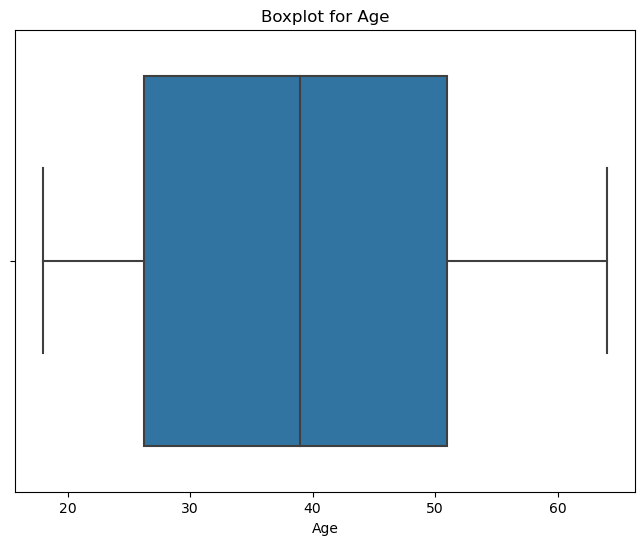

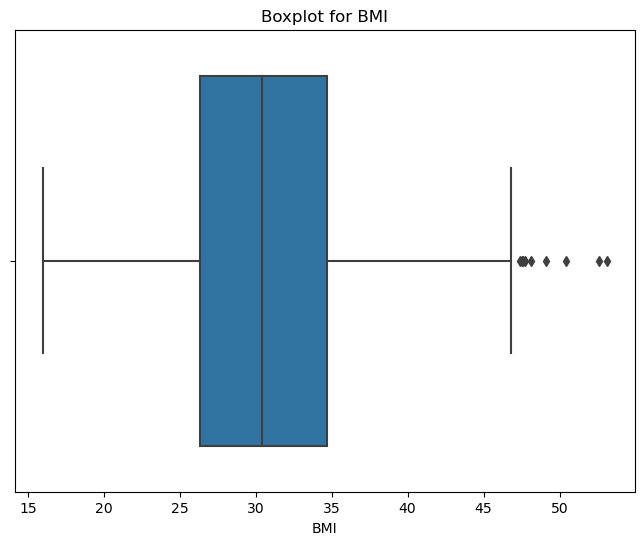

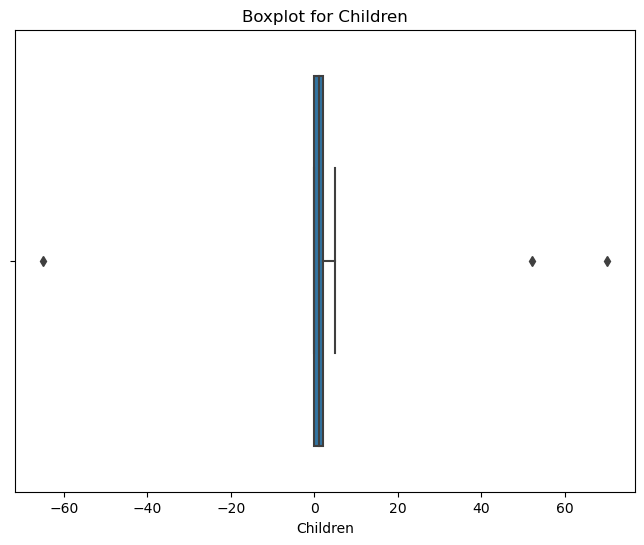

In [5]:
df=data.copy()

# Visualize outliers using boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot for Age')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['BMI'])
plt.title('Boxplot for BMI')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Children'])
plt.title('Boxplot for Children')
plt.show()


In [6]:

# Identify outliers based on Z-scores and remove them
numeric_columns = ['Age', 'BMI', 'Children']

for column in numeric_columns:
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    df = df[z_scores <= 3]

# Display updated dataset
print("Shape of the dataset after removing outliers:", df.shape)


Shape of the dataset after removing outliers: (1319, 7)


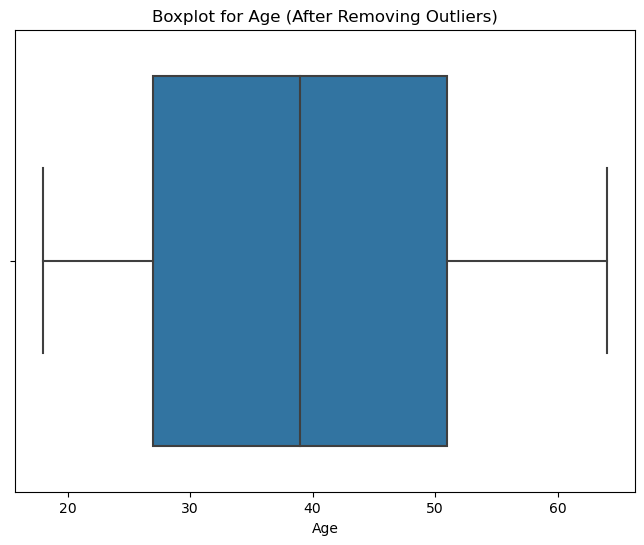

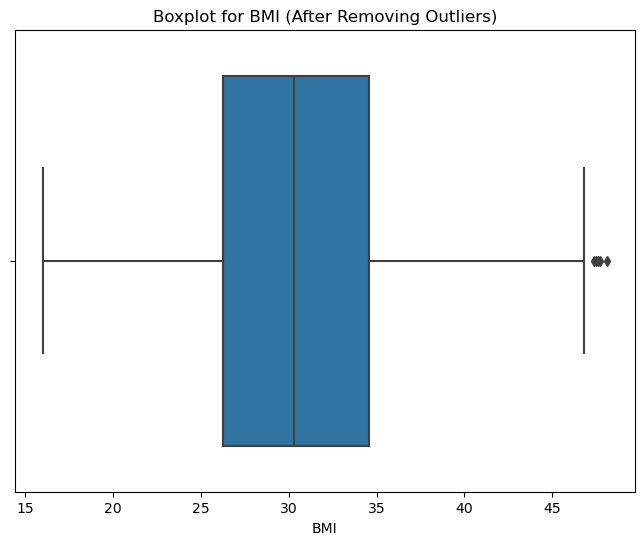

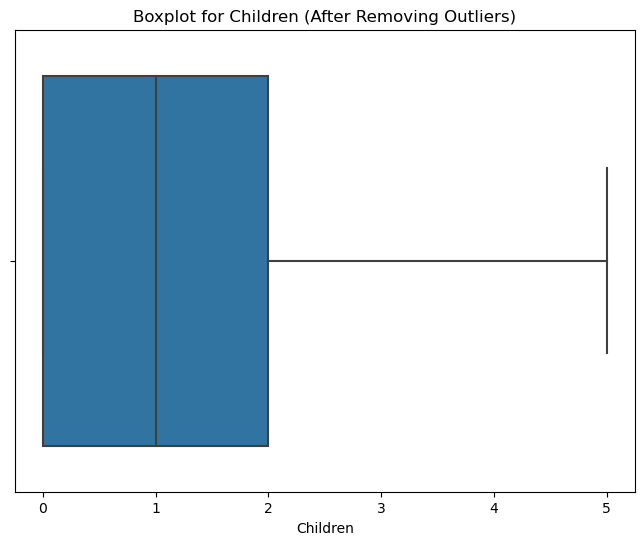

In [7]:
# Visualize updated distributions after removing outliers using boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot for Age (After Removing Outliers)')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['BMI'])
plt.title('Boxplot for BMI (After Removing Outliers)')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Children'])
plt.title('Boxplot for Children (After Removing Outliers)')
plt.show()



# 3. Handling Missing Values:
• Count missing values in each column.
• Apply appropriate strategies to handle missing data (removal or imputation).
Explain your decision for each column.

In [8]:
#Checking missing values across each column

# Count the number of missing values in each column
missing_counts = df.isnull().sum()

#Counting the total number of missing values in total dataset
total_missing_values=missing_counts.sum()

#Storing the total length of the data in the given dataset 
total_len=len(df)


#Checking the missing column values
print(missing_counts)


Age         0
Gender      9
BMI         0
Children    0
Smoker      0
Region      1
Expenses    1
dtype: int64


In [9]:
#Calculating the percentage of missing data for each column which has missing values

#Gender missing percent
Gender_missing_percent =(missing_counts['Gender']/total_len)
print('Percentage of data missing in Gender is: ',Gender_missing_percent)

#Region missing percent
Region_missing_percent =(missing_counts['Region']/total_len)
print('Percentage of data missing in Region is: ',Region_missing_percent)

#Expenses missing percent 
Expenses_missing_percent =(missing_counts['Expenses']/total_len)
print('Percentage of data missing in Expenses column is: ',Expenses_missing_percent)

#Total missing percent in dataset which has at least one column value missing
total_missing_percent_col=(total_missing_values/total_len)
print('Percentage of missing values in the dataset column wise is:',total_missing_percent_col)

Percentage of data missing in Gender is:  0.006823351023502654
Percentage of data missing in Region is:  0.000758150113722517
Percentage of data missing in Expenses column is:  0.000758150113722517
Percentage of missing values in the dataset column wise is: 0.008339651250947688


The missing values percentage in the each column in the given dataset is very less so we are dropping the rows which contains
the  missing values which drops negiable number of rows in the data and also it doesn't effect the training or testing the model

In [10]:
#Dropping rows which containing the null values

df.dropna(inplace=True)


# 4. Data Distribution Visualization:
• Plot histograms for each numerical column.
• Use bar charts or count plots for categorical columns

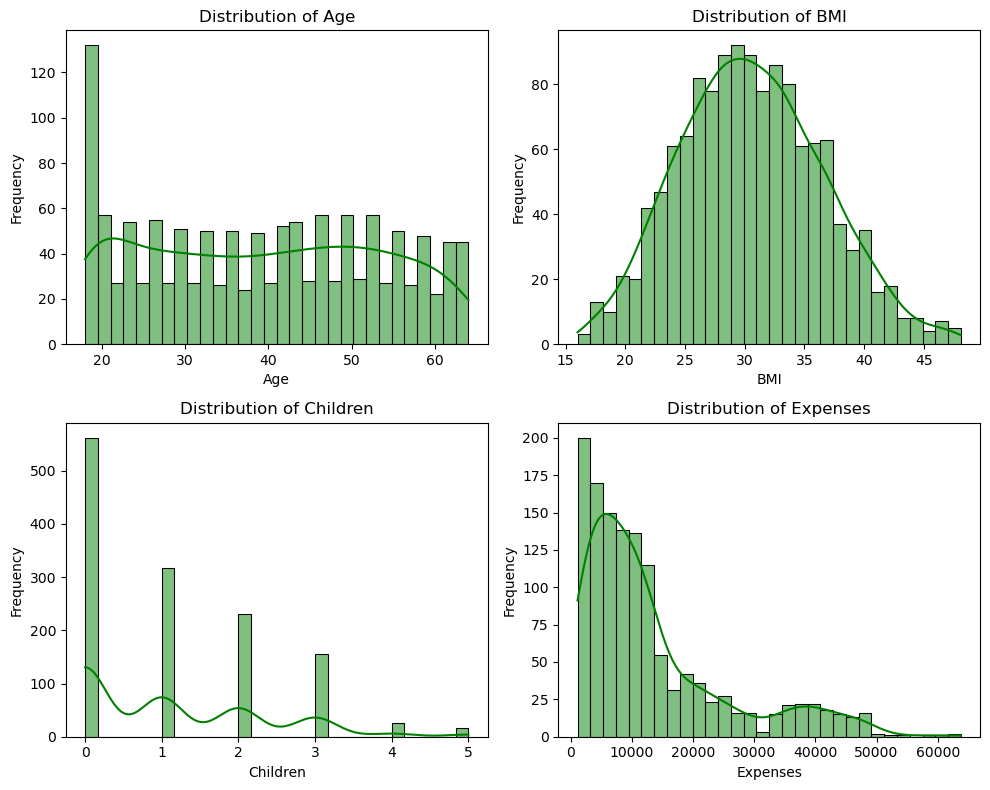

In [11]:
# Plot histograms for numerical columns

numerical_columns = ['Age', 'BMI', 'Children', 'Expenses']

# Calculate the number of rows and columns needed for the subplot grid
num_rows = len(numerical_columns)
num_cols = 2  # You can adjust the number of columns based on your preference

# Create subplots
fig, axes = plt.subplots(nrows=num_rows-2, ncols=num_cols, figsize=(10, 8))

# Flatten the 2D array of subplots to a 1D array
axes = axes.flatten()

# Iterate through numerical columns
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, bins=30, color='green', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')



# Adjust layout for better spacing
plt.tight_layout()
plt.show()





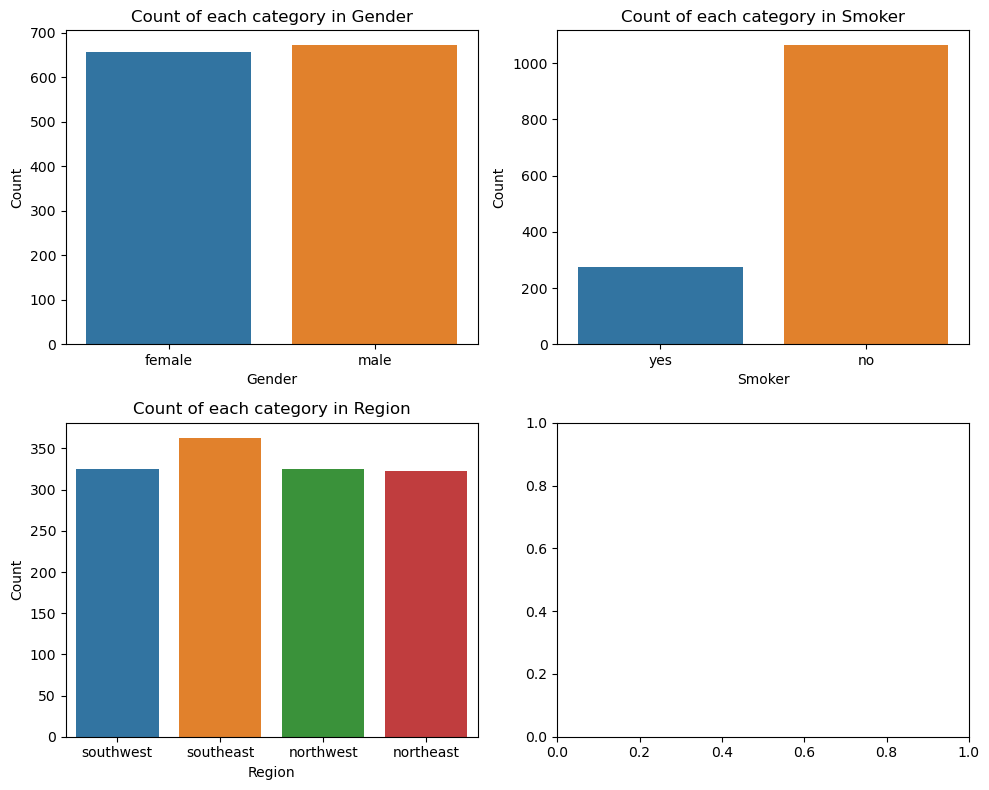

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is a DataFrame containing the categorical columns
categorical_columns = ['Gender', 'Smoker', 'Region']

# Calculate the number of rows and columns needed for the subplot grid
num_rows = len(categorical_columns)
num_cols = 2  # You can adjust the number of columns based on your preference

# Create subplots
fig, axes = plt.subplots(nrows=num_rows-1, ncols=num_cols, figsize=(10,8))

# Flatten the 2D array of subplots to a 1D array
axes = axes.flatten()

# Iterate through categorical columns
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=data, ax=axes[i])
    axes[i].set_title(f'Count of each category in {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')



# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# 5. Descriptive Statistics and Variability Measures:
• Compute descriptive statistics (mean, median, mode, etc.) for numerical 
columns.
• Calculate variability measures (standard deviation, variance, etc.).

In [13]:
for column in df.columns:
    print(f"Descriptive statistics of {column} \n")
    print(df[column].describe())

Descriptive statistics of Age 

count    1308.000000
mean       39.272171
std        14.035563
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: Age, dtype: float64
Descriptive statistics of Gender 

count     1308
unique       2
top       male
freq       660
Name: Gender, dtype: object
Descriptive statistics of BMI 

count    1308.000000
mean       30.588073
std         5.990919
min        16.000000
25%        26.275000
50%        30.300000
75%        34.525000
max        48.100000
Name: BMI, dtype: float64
Descriptive statistics of Children 

count    1308.000000
mean        1.093272
std         1.205262
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: Children, dtype: float64
Descriptive statistics of Smoker 

count     1308
unique       2
top         no
freq      1039
Name: Smoker, dtype: object
Descriptive statistics of Region 

count          1308
unique     

In [28]:
numerical_columns = ['Age', 'BMI', 'Children', 'Expenses']

# Descriptive statistics
desc_stats = df[numerical_columns].describe()

# Variability measures
variance = df[numerical_columns].var()
std_deviation = df[numerical_columns].std()

# Print the results
print("Descriptive Statistics:")
print(desc_stats)

print("\nVariability Measures:")
print("Variance:")
print(variance)

print("\nStandard Deviation:")
print(std_deviation)


Descriptive Statistics:
               Age          BMI     Children     Expenses
count  1308.000000  1308.000000  1308.000000  1308.000000
mean      0.462439     0.454457     0.218654     0.194529
std       0.305121     0.186633     0.241052     0.192991
min       0.000000     0.000000     0.000000     0.000000
25%       0.195652     0.320093     0.000000     0.057863
50%       0.456522     0.445483     0.200000     0.132155
75%       0.717391     0.577103     0.400000     0.252243
max       1.000000     1.000000     1.000000     1.000000

Variability Measures:
Variance:
Age         0.093099
BMI         0.034832
Children    0.058106
Expenses    0.037246
dtype: float64

Standard Deviation:
Age         0.305121
BMI         0.186633
Children    0.241052
Expenses    0.192991
dtype: float64


# 6. Compute Quartiles:
• Determine quartiles for numerical columns (Age, BMI, Children, Expenses)

In [14]:
# Select numerical columns
numerical_columns = ['Age', 'BMI', 'Children', 'Expenses']

# Compute quartiles
quartiles = data[numerical_columns].quantile([0.25, 0.5, 0.75])

# Display quartiles
print("Quartiles for Numerical Columns:")
print(quartiles)


Quartiles for Numerical Columns:
        Age   BMI  Children  Expenses
0.25  26.25  26.3       0.0   4738.27
0.50  39.00  30.4       1.0   9377.90
0.75  51.00  34.7       2.0  16657.72


Age:

25% of the data falls below 26.25.
50% of the data falls below 39.00.
75% of the data falls below 51.00.
BMI (Body Mass Index):

25% of the data falls below 26.3.
50% of the data falls below 30.4.
75% of the data falls below 34.7.
Children:

25% of the data has 0 children.
50% of the data has 1 child.
75% of the data has 2 children.
Expenses:

25% of the data falls below $4,738.27.
50% of the data falls below $9,377.90.
75% of the data falls below $16,657.72.

# 7. Probability Distribution Modeling:
• Fit suitable probability distributions to selected columns and visualize the fits

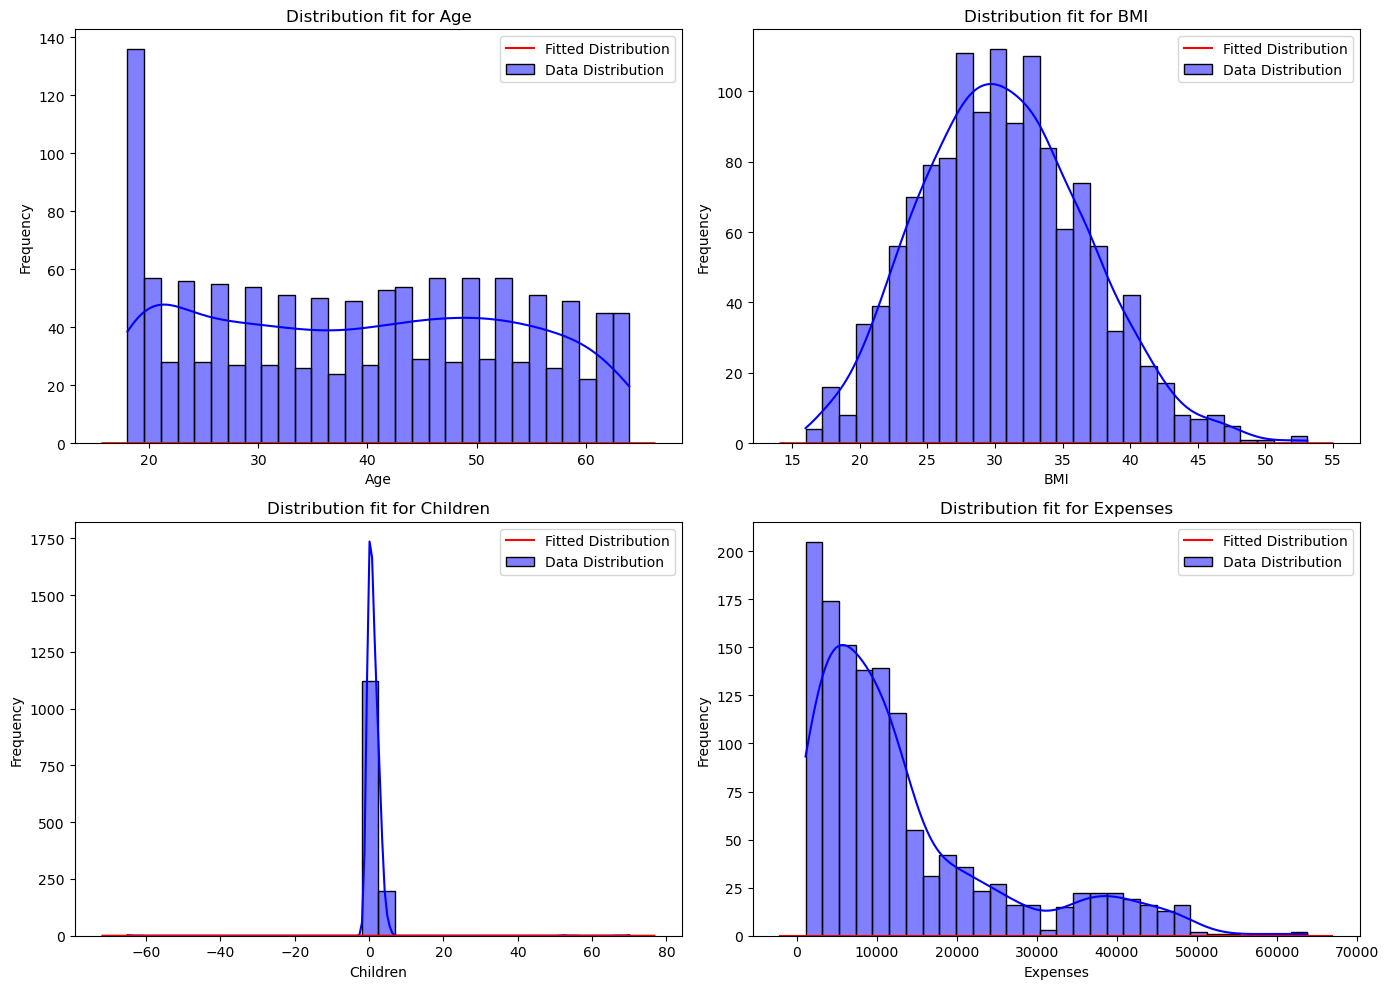

In [15]:
import numpy as np
from scipy.stats import norm, gamma, lognorm
from scipy.stats import probplot
import matplotlib.gridspec as gridspec

# Assuming 'data' is your DataFrame containing the dataset
selected_columns = ['Age', 'BMI', 'Children', 'Expenses']

# Remove rows with missing or infinite values
data_cleaned = data.dropna(subset=selected_columns).replace([np.inf, -np.inf], np.nan)

# Set up subplots
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])

for i, column in enumerate(selected_columns):
    # Create a subplot
    ax = plt.subplot(gs[i])

    # Fit the distribution
    if column == 'Expenses':
        params = lognorm.fit(data_cleaned[column])
        dist = lognorm(*params)
    else:
        params = norm.fit(data_cleaned[column])
        dist = norm(*params)

    # Visualize the fit
    sns.histplot(data_cleaned[column], kde=True, bins=30, ax=ax, color='blue', label='Data Distribution')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    pdf = dist.pdf(x)
    plt.plot(x, pdf, 'r', label='Fitted Distribution')

    # Set titles and labels
    plt.title(f'Distribution fit for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


# 8. Feature Scaling:
• Apply standardization or normalization to the numerical features.

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame containing the dataset
numerical_columns = ['Age', 'BMI', 'Children', 'Expenses']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [17]:
#One-Hot Encoding for the categorical values  ['Gender', 'Smoker', 'Region']

In [18]:
df = pd.get_dummies(df, columns=['Gender', 'Smoker', 'Region'])

In [19]:
df.head(10)

,Age,BMI,Children,Expenses,Gender_female,Gender_male,Smoker_no,Smoker_yes,Region_northeast,Region_northwest,Region_southeast,Region_southwest
0,0.021739,0.370717,0.0,0.251611,True,False,False,True,False,False,False,True
1,0.000000,0.554517,0.2,0.009636,False,True,True,False,False,False,True,False
2,0.217391,0.529595,0.6,0.053115,False,True,True,False,False,False,True,False
3,0.326087,0.208723,0.0,0.333010,False,True,True,False,False,True,False,False
4,0.304348,0.401869,0.0,0.043816,False,True,True,False,False,True,False,False
5,0.282609,0.302181,0.0,0.042056,True,False,True,False,False,False,True,False
6,0.608696,0.542056,0.2,0.113629,True,False,True,False,False,False,True,False
7,0.413043,0.364486,0.6,0.098321,True,False,True,False,False,True,False,False
9,0.913043,0.305296,0.0,0.443766,True,False,True,False,False,True,False,False
10,0.152174,0.317757,0.0,0.025531,False,True,True,False,True,False,False,False


# 9. Linear Regression Modeling:
• Select 'Expenses' as the target variable.
• Create and train a linear regression model using the remaining column

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Selecting features (X) and target variable (y)
features = df.drop('Expenses', axis=1)  # Using all columns except 'Expenses' as features
target = df['Expenses']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# 10. Prediction and Model Evaluation:
• Make predictions using the model.
• Evaluate model performance using R-squared, MSE, or other relevant metrics

In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Optional: Print the coefficients and intercept
print('\nModel Coefficients:')
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print(coefficients)
print(f'Intercept: {model.intercept_:.2f}')

Mean Squared Error: 0.01
R-squared: 0.69

Model Coefficients:
             Feature  Coefficient
0                Age     0.184887
1                BMI     0.176658
2           Children     0.038078
3      Gender_female    -0.001086
4        Gender_male     0.001086
5          Smoker_no    -0.191352
6         Smoker_yes     0.191352
7   Region_northeast     0.008167
8   Region_northwest     0.003222
9   Region_southeast    -0.006915
10  Region_southwest    -0.004473
Intercept: 0.13


1. Mean Squared Error (MSE):
   The MSE is a measure of the average squared difference between actual and predicted values. In above case, the MSE is 0.01. Lower MSE values indicate better model performance.
2. R-squared (R²):
   R-squared is a statistical measure of how well the regression predictions approximate the real data points. It ranges from 0 to 1, with 1 indicating a perfect fit. In above case, R-squared is 0.69, suggesting that the model explains about 69% of the variance in the dependent variable.
3. Model Coefficients:
   These coefficients represent the weights assigned to each feature in the model. They indicate the strength and direction of the relationship between each feature and the predicted outcome.For example, a positive coefficient for "Age" suggests that as age increases, the predicted outcome also increases.
